In [1]:
import pandas as pd
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
titanic_df = pd.read_csv(r'D:\programming\machine learning\kaggle\titanic\train.csv')

Data Dictionary about the dataset for titanic🚢

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number

embarked	
Port of Embarkation	
C = Cherbourg, 
Q = Queenstown, 
S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: 
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:


5.) What factors helped someone survive the sinking?

Lets start with first question, 

1. Who were the passengers👨‍👨‍👦‍👦👨‍👨‍👧‍👧 on titanic🛳

In [6]:
# lets import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

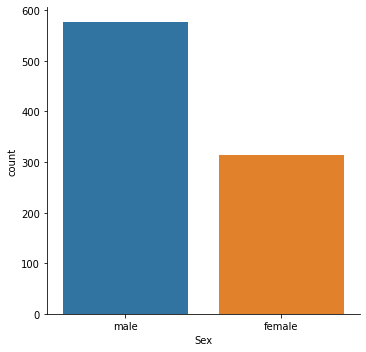

In [7]:
#let's first check gender
sns.catplot('Sex', data=titanic_df,kind="count")
# more than 50% of the passengers are male

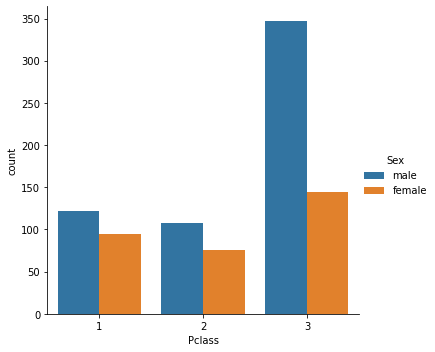

In [8]:
# checking how many males and females were present in each class
sns.catplot('Pclass', data=titanic_df,kind='count', hue='Sex');

More than 50% of class 3 passengers were males👨

In [9]:
#now lets create a separate column for children
def male_female_child(passenger):
    '''
    we will be passing Age and Sex, and if age is less than 16 years old, then we would consider that passenger as a child
    '''
    sex,age = passenger
    #comparing the age
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
# we are creating a new column named 'person', we need specify axis=1 for column
titanic_df['person'] = titanic_df[['Sex', 'Age']].apply(male_female_child, axis=1)

In [11]:
titanic_df['person'].value_counts()/len(titanic_df)*100

male      60.269360
female    30.415264
child      9.315376
Name: person, dtype: float64

In [12]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


We need to separate passengers between male, female, and children because always the preference is given to female and child

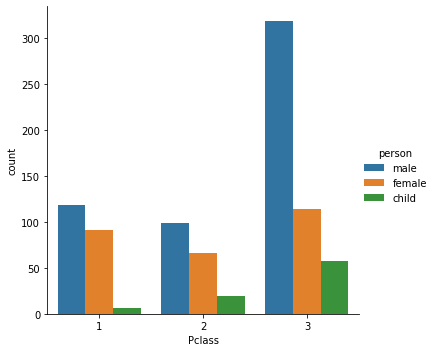

In [13]:
# now lets see how many males, females, children are present in each class
sns.catplot('Pclass', data=titanic_df, kind="count", hue='person');

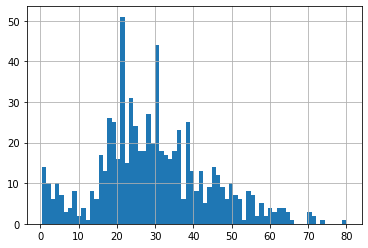

In [14]:
# check the ages of the passengers
# quick way to get the histogram is using pandas itself
titanic_df['Age'].hist(bins=70);

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

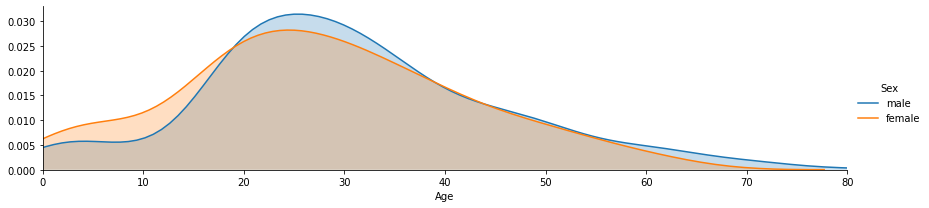

In [16]:
# Another value to visualize the data is to use FacetGrid to plot multiple kdeplots on one plot

#Set the figure equal to a facetgrid with the pandas dataframe as its source, set the hue, and aspect ratio.
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

#next use map to plot all the possible kdeplots  for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

# setting the upper limit by the oldest passenger
oldest = titanic_df['Age'].max()

# since we know that no one can be of negative age, we will set the lowest limit as zero
fig.set(xlim=(0, oldest))
fig.add_legend();

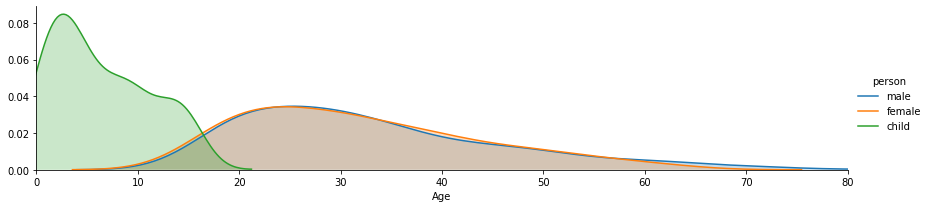

In [17]:
# we could have done the same Age distribution with the 'person' columm to include children
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend();

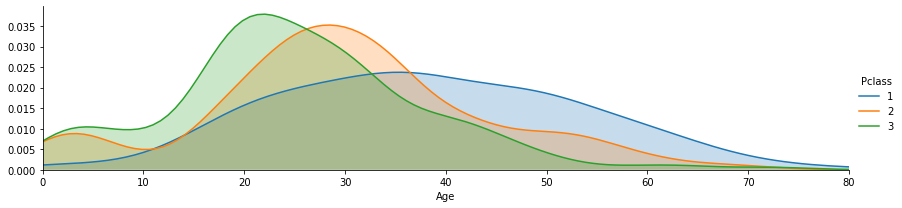

In [18]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend();

We got pretty good picture of who the passengers are based on Sex, Age, and Class

2. Lets check if the what are the deck of the passengers and how they are related to the class?

In [19]:
#lets get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
# Deck information is present in Cabin variable
# we can see there are lot of NaN in the Cabin variable
# lets get the Deck information from Cabin variable
deck = DataFrame(titanic_df['Cabin'].str.slice(0,1).dropna())
deck.columns=['Deck']

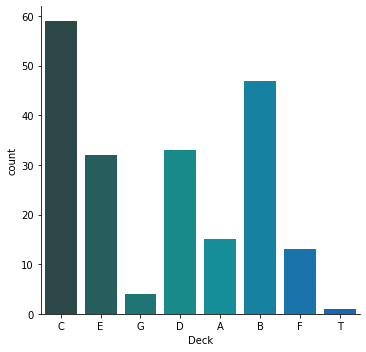

In [21]:
# visualization Deck information
sns.catplot('Deck', data=deck,kind='count', palette='winter_d');

We have a 'T' deck which doesn't make sense much, better to drop it off.

In [22]:
# Redefining the Deck information after deleting T deck
deck = deck[deck.Deck!='T']

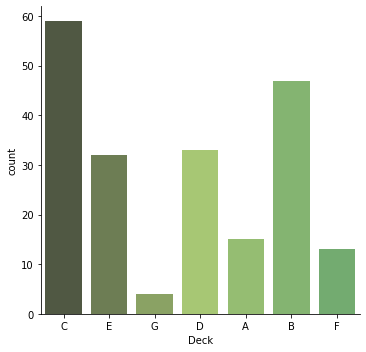

In [23]:
#replot the Deck information
sns.catplot('Deck', data=deck, kind='count', palette='summer_d');

Now check from where the passengers come from and how does that relate to the passenger Class?

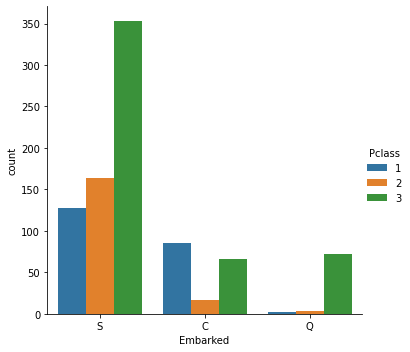

In [24]:
sns.catplot("Embarked", data=titanic_df, kind='count',hue='Pclass', row_order=['C','Q','S']);

It is interesting to note that most of the passengers embarked from 'Q' took class 3, must be related to the economy of that city

Now check about the family, who are alone and who are travelling with family?

In [25]:
# let's start by adding a new column which will define the alone

#We will add the parent/child column with sibsp column
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp

In [26]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1


In [27]:
# Now we know if the Alone>0, then that passenger had family aboard and wasn't alone.
# if Alone=0, passenger is alone
titanic_df['Alone'].loc[titanic_df['Alone']>0] ='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


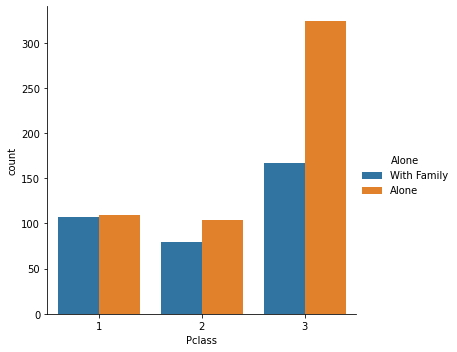

In [29]:
# now lets see the visualization for a passenger travelling alone or with Family with respect to ship class
sns.catplot("Pclass",data=titanic_df, kind='count', hue='Alone');

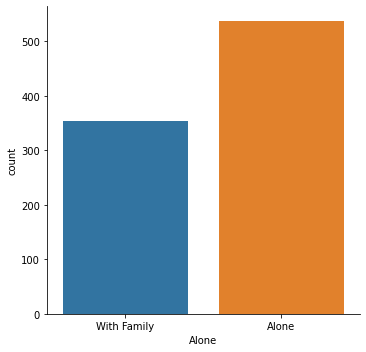

In [30]:
# check the passenger categorization between Alone or with Family
sns.catplot("Alone", data=titanic_df, kind='count');

Now find out the factors which help someone survive the sinking?

In [31]:
# lets start by creating a new colummns which tells us more clearly whether person survived or not
titanic_df['Survivor'] = titanic_df['Survived'].map({0:"no", 1:"yes"})

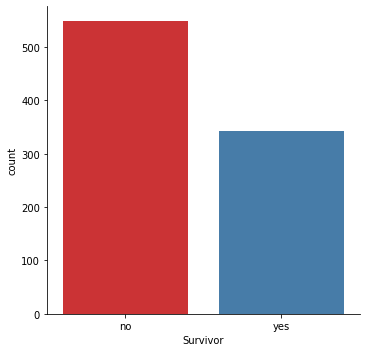

In [32]:
# let's check the visualization of Survivor
sns.catplot("Survivor", data=titanic_df, kind='count', palette='Set1');

this means that more than 50% of the passengers died during the Titanic sinking, let's see if the class plays any role in it.

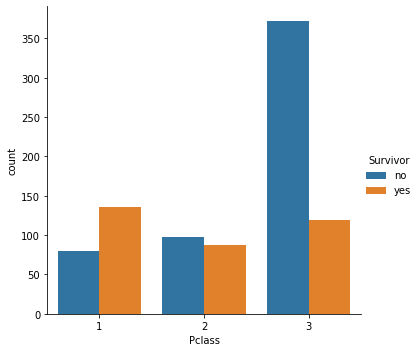

In [33]:
sns.catplot("Pclass", data=titanic_df, kind="count", hue='Survivor');

Above shows that class 3 passengers doesn't survived much

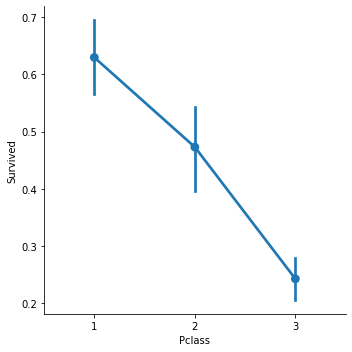

In [34]:
sns.catplot('Pclass','Survived', data=titanic_df, kind="point");

It confirms that survival rate in class 3 is substantially lower than other classes.

It see if the person type also a conrtibuting factor for surviving rate

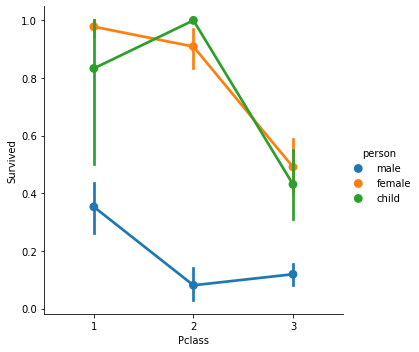

In [35]:
# lets plot the Surviving with Pclass and person
sns.catplot('Pclass','Survived',data=titanic_df, hue='person', kind='point');

From above, it seems that being a male decrease the survival rate very less. Class also somewhat contribute to the surival but
not more than male.

Let's see about the being younger or older has any effect on the survival rate?

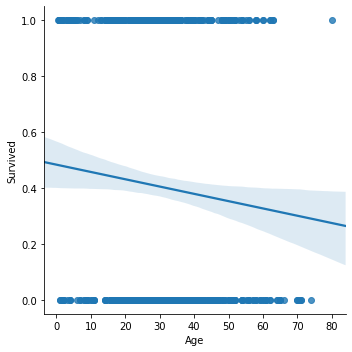

In [36]:
# lets use a linear plot on age versus survival
sns.lmplot('Age','Survived', data=titanic_df);

It seems like older the person, less likely she/he survived the sinking.

Let's check the class effect on above plot

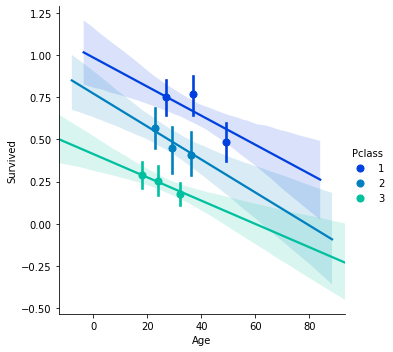

In [37]:
# lets check linear plot of Age vs Survived with Class as hue
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Pclass', palette='winter', x_bins=3);

Older people in the 1st class had better chance of surviving.

Lets check about the gender and Age

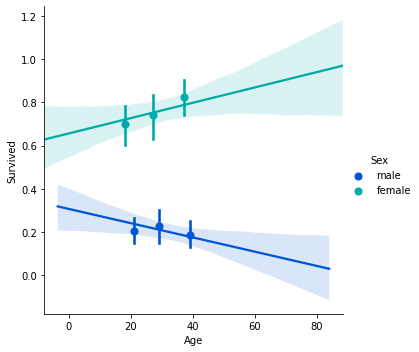

In [38]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=3);

let's see Family plays any role in surviving of the passenger

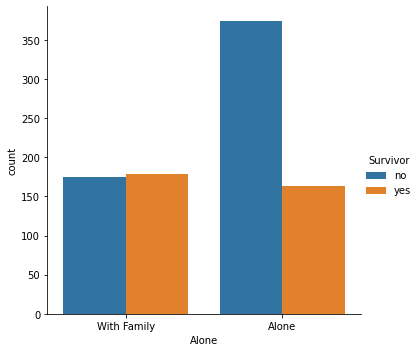

In [39]:
sns.catplot('Alone', data=titanic_df, kind='count', hue='Survivor');

Above shows that Family does raises the chance of surviving but not that much same number of families dies and survives but Alone person has more than 50% chance of not surviving.

In [40]:
Cabin_Surv = DataFrame(titanic_df['Survivor'], titanic_df['Embarked'])

Checking if the Deck position has any role in surviving rate?

In [41]:
Surv_Cabin_post = DataFrame(titanic_df['Survivor'])
Surv_Cabin_post['Deck'] = titanic_df['Cabin'].str.slice(0,1)

In [42]:
Surv_Cabin_post = Surv_Cabin_post[Surv_Cabin_post['Deck'].notnull()]

In [43]:
Surv_Cabin_post = Surv_Cabin_post[Surv_Cabin_post['Deck']!='T']

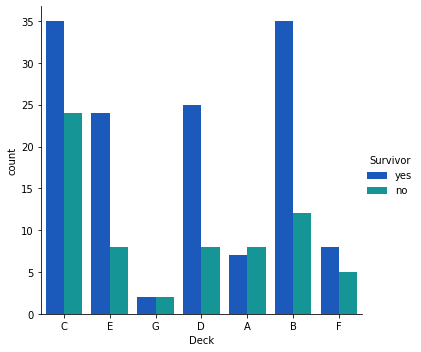

In [44]:
sns.catplot("Deck", data=Surv_Cabin_post, hue='Survivor', kind='count', palette='winter');

Above graph shows that the people who were one C,B deck had more survival rate than on people on other deck.